https://www.kaggle.com/datasets/pushpakhinglaspure/used-car-price-prediction

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import pandas as pd
import dtreeviz

In [2]:
# load the cars dataset
df = pd.read_csv("cars.csv")

In [3]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
# check duplicates
df.duplicated().sum()

2

In [5]:
# remove duplicates
df.drop_duplicates(inplace=True)

In [6]:
# check nan values
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
# use LabelEncoder to have all numeric
from sklearn.preprocessing import LabelEncoder
variables = ['Fuel_Type', 'Seller_Type', 'Transmission']
encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [10]:
# check unique values for column
# One-Hot Encoding is not a solution
# becuase we will lose a target column
unique_values = df['Car_Name'].unique()
print("Unique values of column 'Car_Name':")
print(unique_values)

Unique values of column 'Car_Name':
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Ba

In [11]:
car_names = df['Car_Name'].tolist()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Car_Name' column
encoded_car_names = label_encoder.fit_transform(car_names)

# Create a dictionary to store the mapping of car names to encoded numbers
car_name_mapping = {car: encoded for car, encoded in zip(car_names, encoded_car_names)}

# Update the DataFrame with the encoded values
df['Car_Name'] = encoded_car_names

# Print the mapping of car names to encoded numbers
print("Mapping of car names to encoded numbers:")
for car, encoded in sorted(car_name_mapping.items(), key=lambda x: x[1]):
    print(f"{car}: {encoded}")

Mapping of car names to encoded numbers:
800: 0
Activa 3g: 1
Activa 4g: 2
Bajaj  ct 100: 3
Bajaj Avenger 150: 4
Bajaj Avenger 150 street: 5
Bajaj Avenger 220: 6
Bajaj Avenger 220 dtsi: 7
Bajaj Avenger Street 220: 8
Bajaj Discover 100: 9
Bajaj Discover 125: 10
Bajaj Dominar 400: 11
Bajaj Pulsar  NS 200: 12
Bajaj Pulsar 135 LS: 13
Bajaj Pulsar 150: 14
Bajaj Pulsar 220 F: 15
Bajaj Pulsar NS 200: 16
Bajaj Pulsar RS200: 17
Hero  CBZ Xtreme: 18
Hero  Ignitor Disc: 19
Hero Extreme: 20
Hero Glamour: 21
Hero Honda CBZ extreme: 22
Hero Honda Passion Pro: 23
Hero Hunk: 24
Hero Passion Pro: 25
Hero Passion X pro: 26
Hero Splender Plus: 27
Hero Splender iSmart: 28
Hero Super Splendor: 29
Honda Activa 125: 30
Honda Activa 4G: 31
Honda CB Hornet 160R: 32
Honda CB Shine: 33
Honda CB Trigger: 34
Honda CB Unicorn: 35
Honda CB twister: 36
Honda CBR 150: 37
Honda Dream Yuga : 38
Honda Karizma: 39
Hyosung GT250R: 40
KTM 390 Duke : 41
KTM RC200: 42
KTM RC390: 43
Mahindra Mojo XT300: 44
Royal Enfield Bullet 

In [12]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [13]:
X = df.drop('Car_Name', axis=1)
y = df['Car_Name']

In [14]:
# Fit the decision tree classifier with default hyper-parameters
clf = DecisionTreeClassifier()
model = clf.fit(X, y)

KeyError: 2

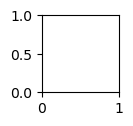

In [15]:
# pip install dtreeviz
import dtreeviz
viz_model = dtreeviz.model(clf,
                           X_train=X, y_train=y,
                           feature_names=X.columns,
                           target_name='Decision',
                           class_names=["No", "Yes"])

# for viewing in the Jupyter notebook
# Note: this is not practical with large 
# decision trees!
# adjust the scale if you need a bigger picture (for example 2.5)
viz_model.view(scale=1.5).save("cars.svg") 